### **Feature Engineering**


### **Cài đặt thư viện**


In [601]:
from IPython.core.interactiveshell import InteractiveShell
from pprint import pprint
import pandas as pd
import numpy as np
import warnings
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns


warnings.filterwarnings("ignore")
InteractiveShell.ast_node_interactivity = "all"

%load_ext autotime

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 0 ns (started: 2023-05-21 17:35:52 +07:00)


In [602]:
df_watch = pd.read_csv("../main/clean_data/clean_data.csv")

df_watch = df_watch.drop(df_watch.columns[0], axis=1)

df_watch.head()


,Mã sản phẩm,Thương hiệu,Giá tiền (VNĐ),Chất liệu dây,Chất liệu vỏ,Xuất xứ,Giới tính,Chất liệu mặt kính,Độ chịu nước (ATM),Bảo hành,Kiểu máy,Kích cỡ (mm)
0,PA5018H,Philippe Auguste,4581000,Dây da,Thép không gỉ,Trung Quốc,Nam,Kính sapphire,5.0,2.0,Quartz,42.0
1,PA5018G,Philippe Auguste,4581000,Dây da,Thép không gỉ,Trung Quốc,Nam,Kính sapphire,5.0,2.0,Quartz,42.0
2,PA2022,Philippe Auguste,10710000,Dây da,Thép không gỉ,Trung Quốc,Nam,Kính sapphire,5.0,2.0,Quartz,40.0
3,PA5021B,Philippe Auguste,5379300,Dây da,Thép không gỉ,Trung Quốc,Nam,Kính sapphire,10.0,2.0,Quartz,42.0
4,PA5021H,Philippe Auguste,5990400,Dây da,Thép không gỉ,Trung Quốc,Nam,Kính sapphire,10.0,2.0,Quartz,42.0


time: 47 ms (started: 2023-05-21 17:35:52 +07:00)


In [603]:
df_watch.shape

(13851, 12)

time: 0 ns (started: 2023-05-21 17:35:52 +07:00)


In [604]:
df_watch.dtypes

Mã sản phẩm            object
Thương hiệu            object
Giá tiền (VNĐ)          int64
Chất liệu dây          object
Chất liệu vỏ           object
Xuất xứ                object
Giới tính              object
Chất liệu mặt kính     object
Độ chịu nước (ATM)    float64
Bảo hành              float64
Kiểu máy               object
Kích cỡ (mm)          float64
dtype: object

time: 0 ns (started: 2023-05-21 17:35:52 +07:00)


In [605]:
df_watch.isna().sum()

Mã sản phẩm            27
Thương hiệu           327
Giá tiền (VNĐ)          0
Chất liệu dây         393
Chất liệu vỏ          503
Xuất xứ               257
Giới tính              72
Chất liệu mặt kính     48
Độ chịu nước (ATM)    165
Bảo hành              123
Kiểu máy               28
Kích cỡ (mm)          245
dtype: int64

time: 15 ms (started: 2023-05-21 17:35:52 +07:00)


- Các cột null ở mức độ tương đối


In [606]:
df_watch = df_watch[df_watch["Mã sản phẩm"].isnull() == False]

df_watch["Giá tiền (VNĐ)"] = df_watch["Giá tiền (VNĐ)"].astype(float)

time: 0 ns (started: 2023-05-21 17:35:52 +07:00)


In [607]:
df_watch.drop("Mã sản phẩm", axis=1).describe()

,Giá tiền (VNĐ),Độ chịu nước (ATM),Bảo hành,Kích cỡ (mm)
count,1.382400e+04,13673.000000,13701.000000,13595.000000
mean,1.064098e+07,5.693118,1.926648,37.204565
std,1.647904e+07,3.941612,3.429235,6.166297
min,4.150000e+05,3.000000,1.000000,8.000000
25%,3.690000e+06,3.000000,1.000000,33.000000
50%,5.512500e+06,5.000000,2.000000,40.000000
75%,9.906300e+06,5.000000,2.000000,41.500000
max,3.775860e+08,60.000000,100.000000,62.500000


time: 16 ms (started: 2023-05-21 17:35:52 +07:00)


In [608]:
df_watch = df_watch.apply(lambda x: x.fillna(x.value_counts().index[0]))

time: 31 ms (started: 2023-05-21 17:35:52 +07:00)


In [609]:
df_watch.isnull().sum()


Mã sản phẩm           0
Thương hiệu           0
Giá tiền (VNĐ)        0
Chất liệu dây         0
Chất liệu vỏ          0
Xuất xứ               0
Giới tính             0
Chất liệu mặt kính    0
Độ chịu nước (ATM)    0
Bảo hành              0
Kiểu máy              0
Kích cỡ (mm)          0
dtype: int64

time: 16 ms (started: 2023-05-21 17:35:52 +07:00)


In [610]:
df_watch.drop('Mã sản phẩm', axis=1, inplace=True)

time: 16 ms (started: 2023-05-21 17:35:52 +07:00)


Processing Categorical Features


In [611]:
from sklearn.preprocessing import LabelEncoder

name_cols_numeric = [
    "Giá tiền (VNĐ)",
    "Độ chịu nước (ATM)",
    "Kích cỡ (mm)",
]

name_cols = list(df_watch.columns)

for val in name_cols:
    if val in name_cols_numeric:
        name_cols.remove(val)

name_cols_cate = name_cols


def encoding_category_col(df, lst_col):
    for val in lst_col:
        le = LabelEncoder()
        df[val] = le.fit_transform(df[val])

    return df


df_watch = encoding_category_col(df_watch, name_cols_cate)

df_watch.head()

,Thương hiệu,Giá tiền (VNĐ),Chất liệu dây,Chất liệu vỏ,Xuất xứ,Giới tính,Chất liệu mặt kính,Độ chịu nước (ATM),Bảo hành,Kiểu máy,Kích cỡ (mm)
0,43,4581000.0,1,5,7,0,6,5.0,1,7,42.0
1,43,4581000.0,1,5,7,0,6,5.0,1,7,42.0
2,43,10710000.0,1,5,7,0,6,5.0,1,7,40.0
3,43,5379300.0,1,5,7,0,6,10.0,1,7,42.0
4,43,5990400.0,1,5,7,0,6,10.0,1,7,42.0


time: 16 ms (started: 2023-05-21 17:35:52 +07:00)


Train & Test Dataset


In [612]:
from sklearn.model_selection import train_test_split

train_ds, test_ds = train_test_split(df_watch, test_size=0.2, random_state=0)


time: 0 ns (started: 2023-05-21 17:35:52 +07:00)


Distribution train_ds


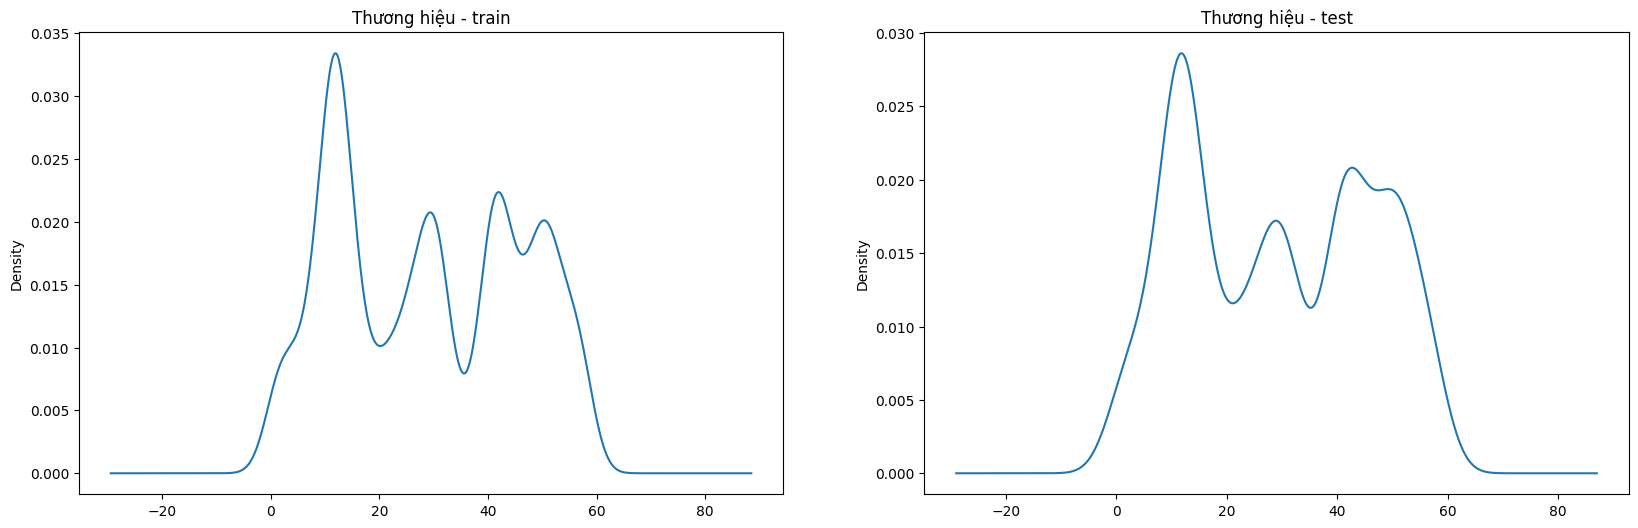

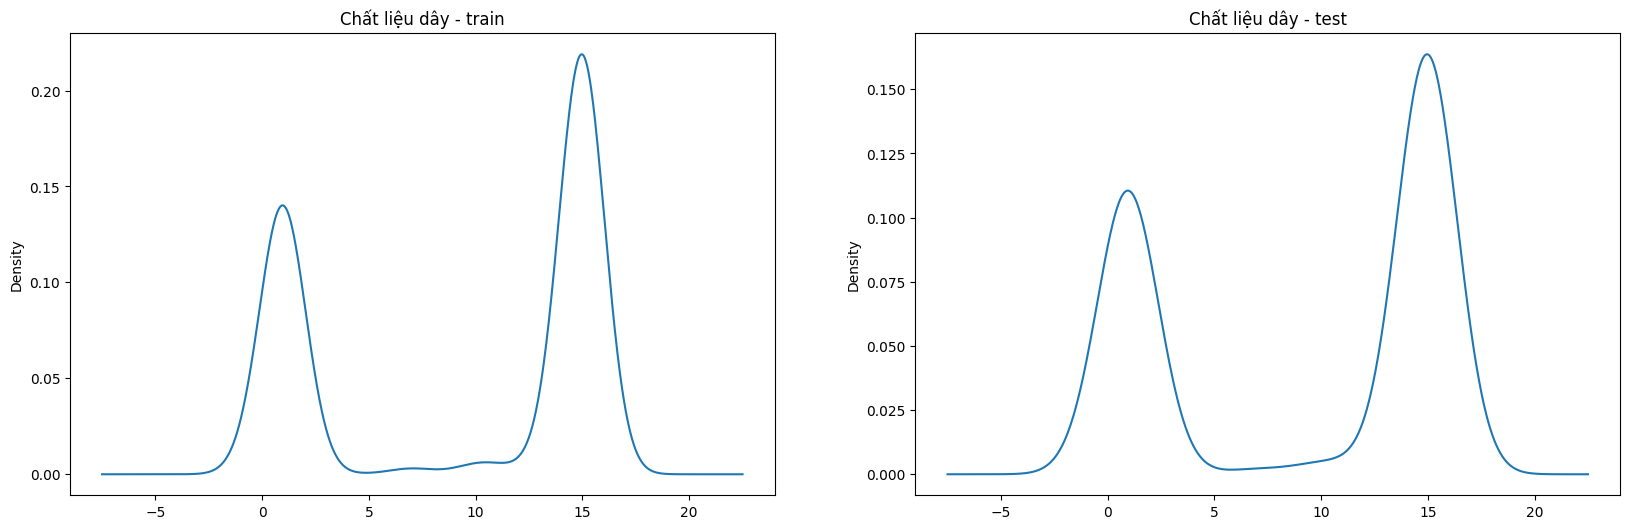

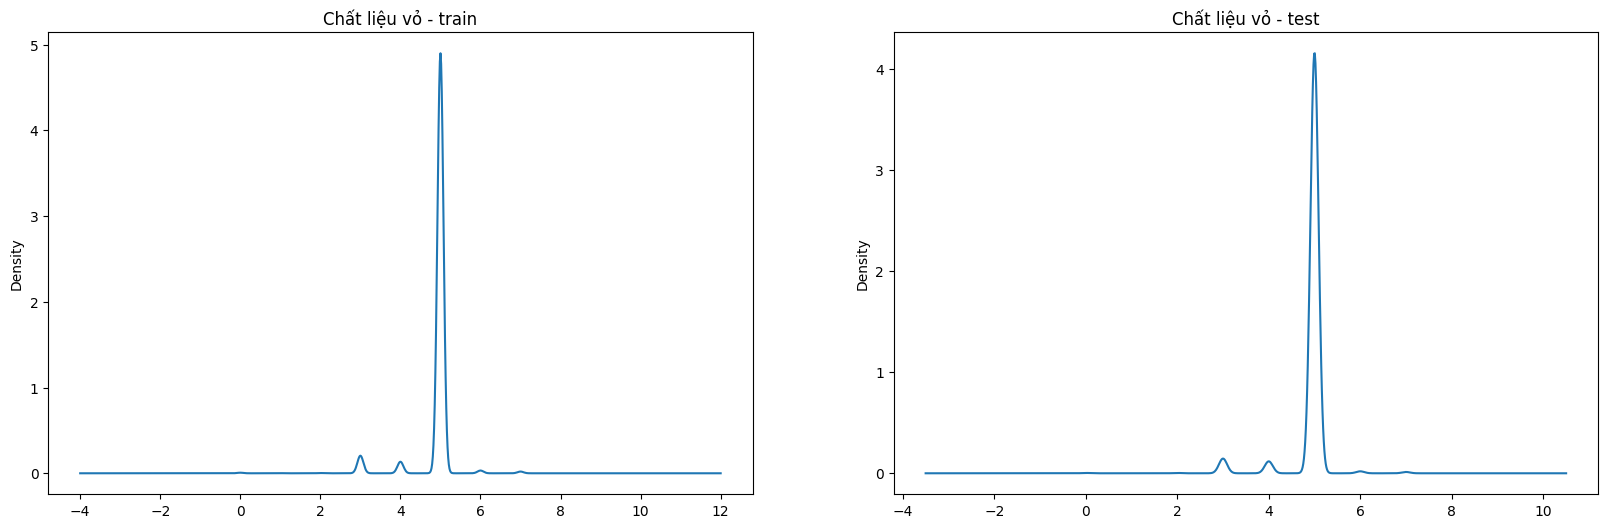

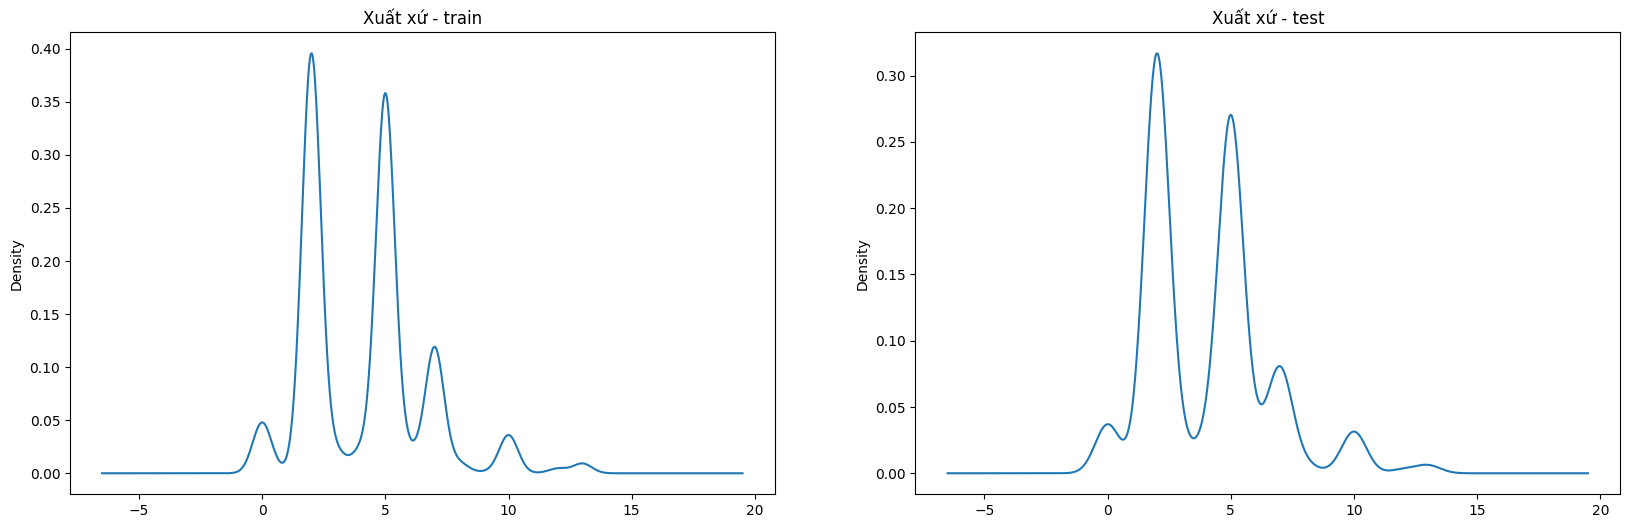

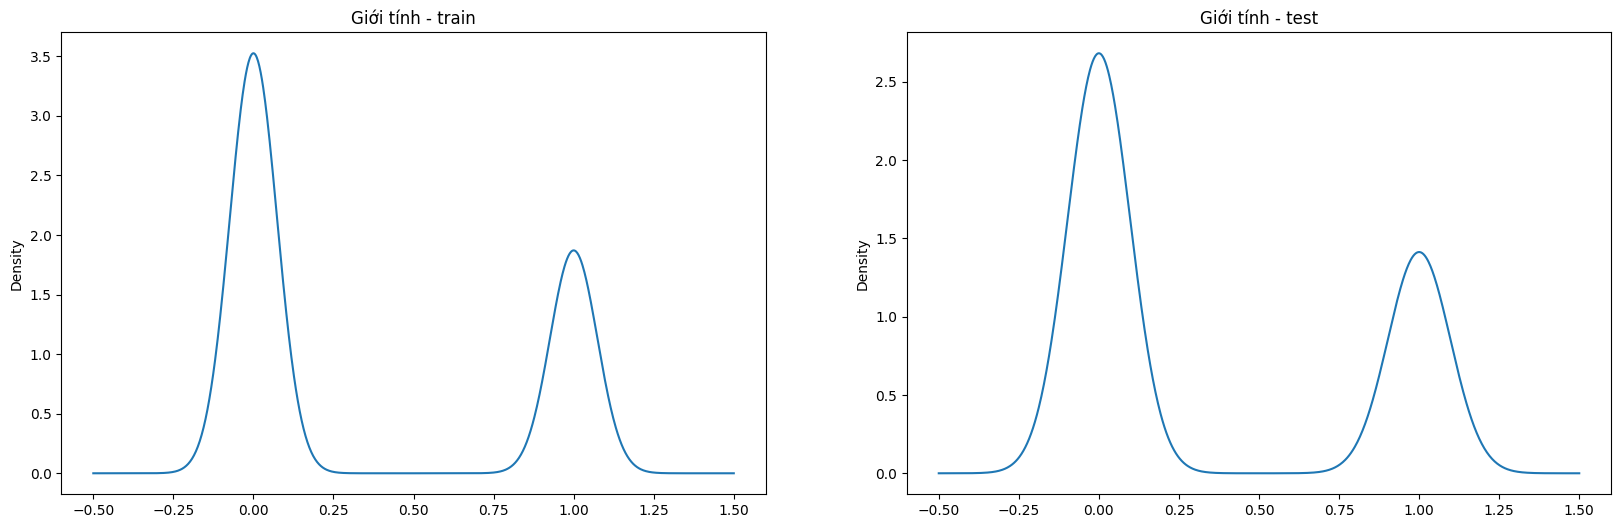

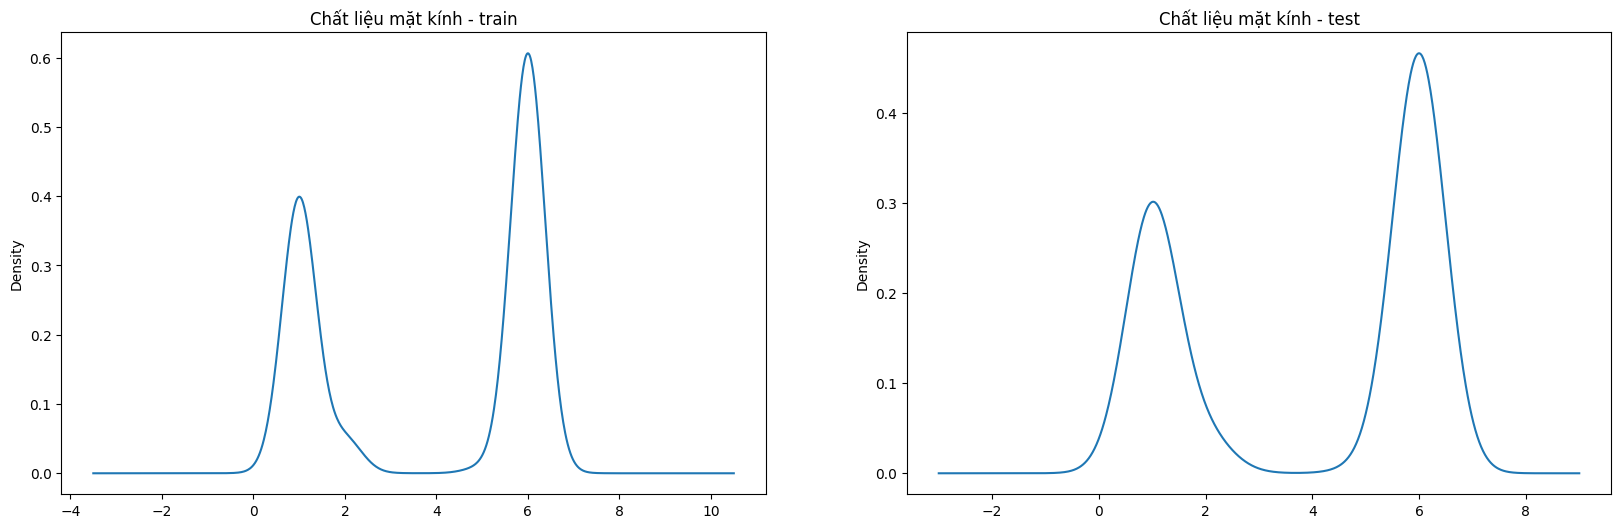

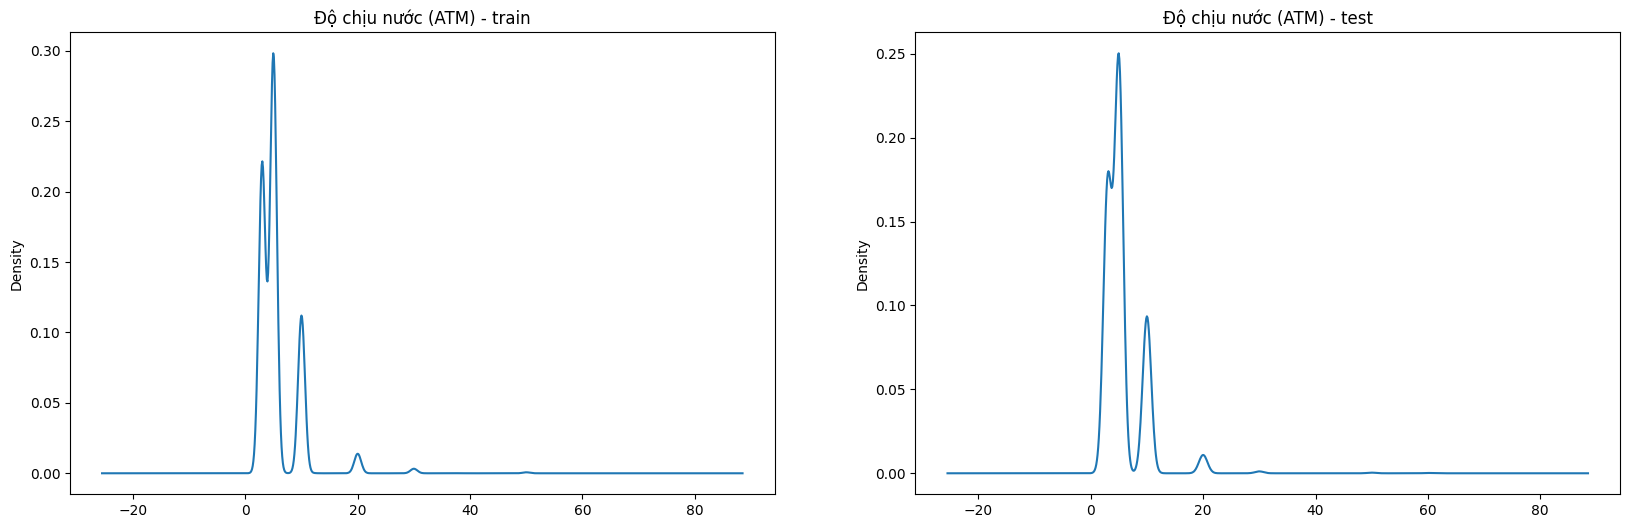

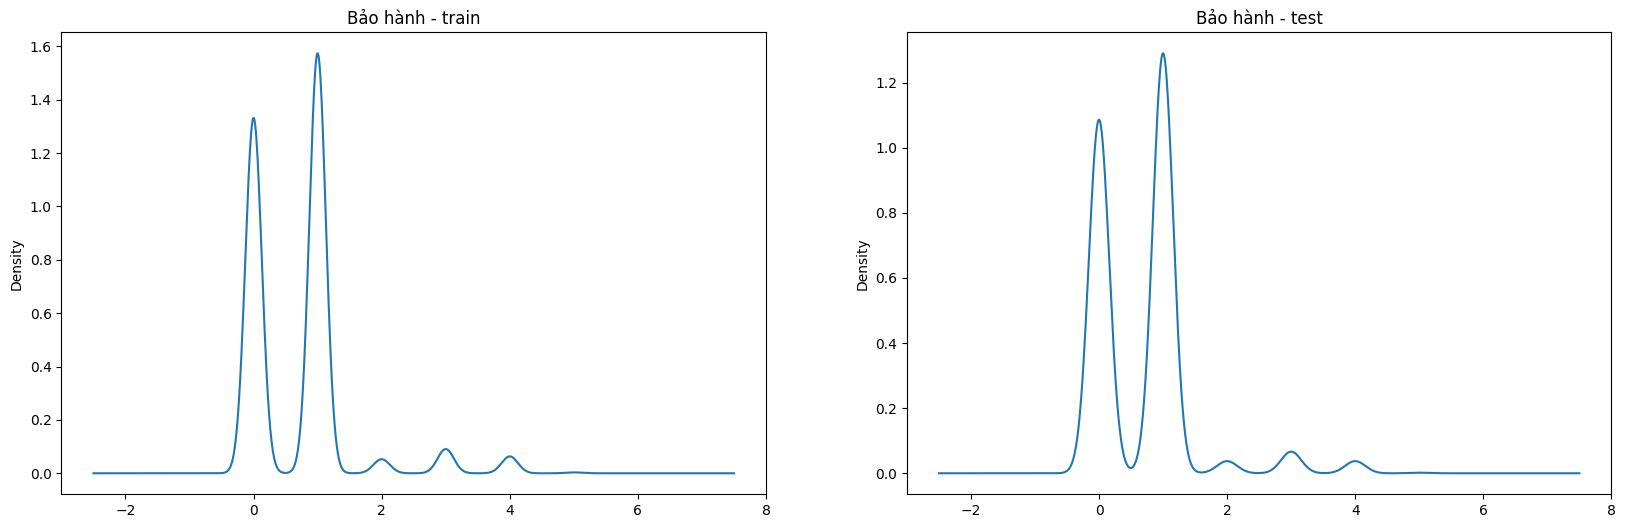

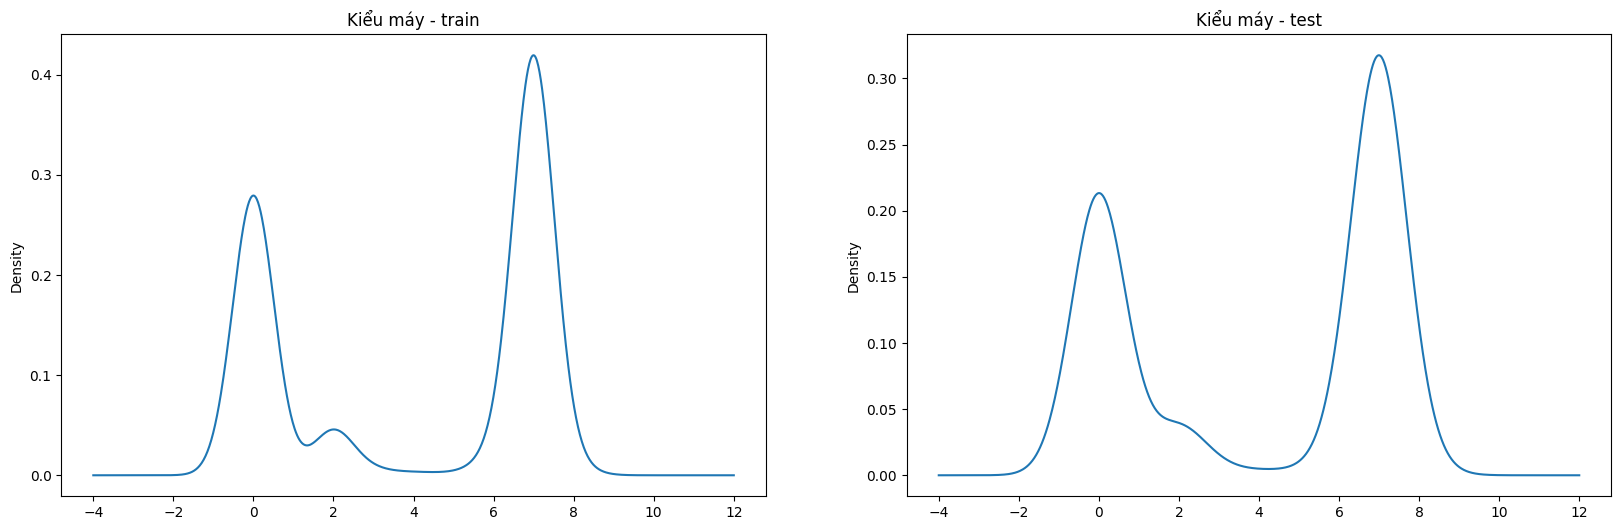

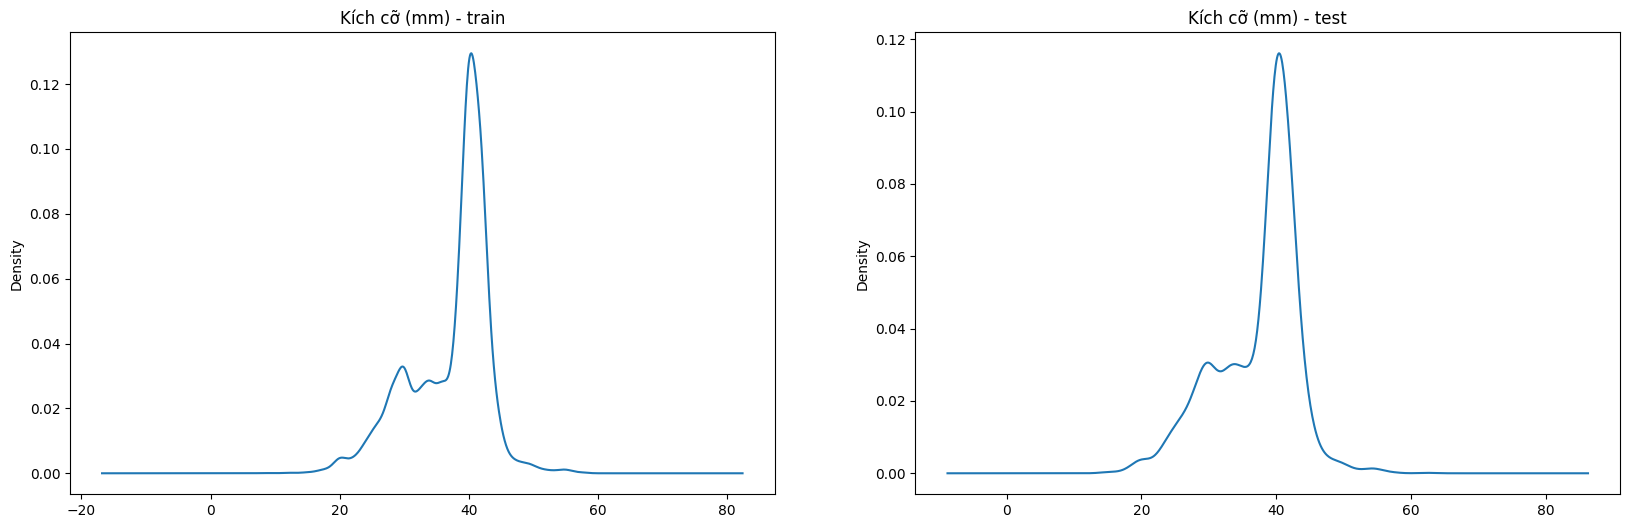

time: 5.86 s (started: 2023-05-21 17:35:52 +07:00)


In [613]:
for c in list(df_watch.columns.drop(["Giá tiền (VNĐ)"])):
    fig, ax = plt.subplots(1, 2, figsize=(20, 6))
    ax1 = plt.subplot(121)

    ax1 = train_ds[c].plot(kind="kde")
    ax1.set_title(f"{c} - train")

    ax2 = plt.subplot(122)
    ax2 = test_ds[c].plot(kind="kde")
    ax2.set_title(f"{c} - test")


plt.show();


Outlier processing


In [614]:
def outlier_processing(X):
    for name_col in list(X.columns):
        upper_bound = X[name_col].mean() + 3 * X[name_col].std()
        lower_bound = X[name_col].mean() - 3 * X[name_col].std()

        X.loc[X[name_col] < lower_bound, name_col] = lower_bound
        X.loc[X[name_col] > upper_bound, name_col] = upper_bound

        return X

    return X


time: 0 ns (started: 2023-05-21 17:35:58 +07:00)


<Axes: ylabel='Density'>

Text(0.5, 1.0, 'Thương hiệu')

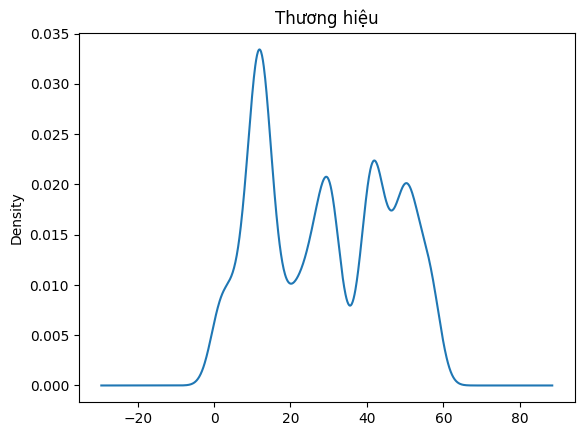

<Axes: ylabel='Density'>

Text(0.5, 1.0, 'Giá tiền (VNĐ)')

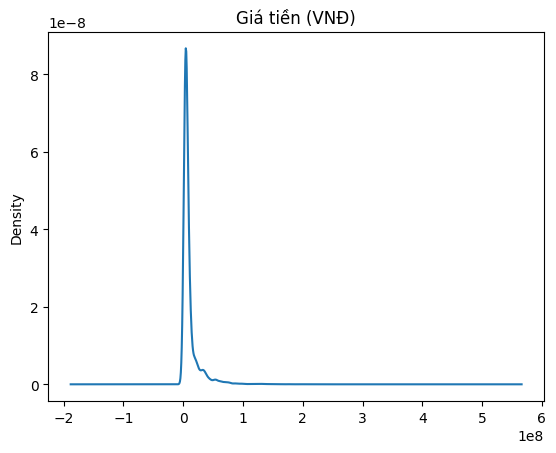

<Axes: ylabel='Density'>

Text(0.5, 1.0, 'Chất liệu dây')

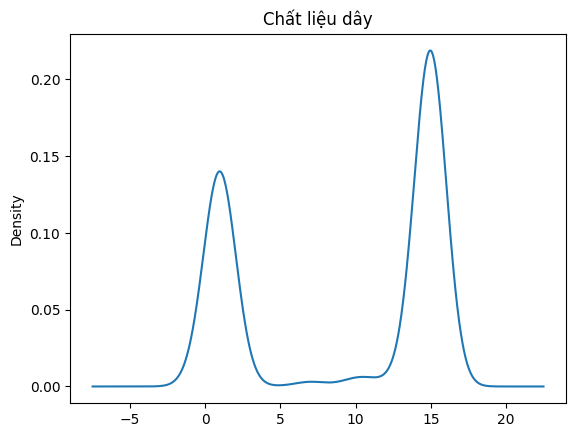

<Axes: ylabel='Density'>

Text(0.5, 1.0, 'Chất liệu vỏ')

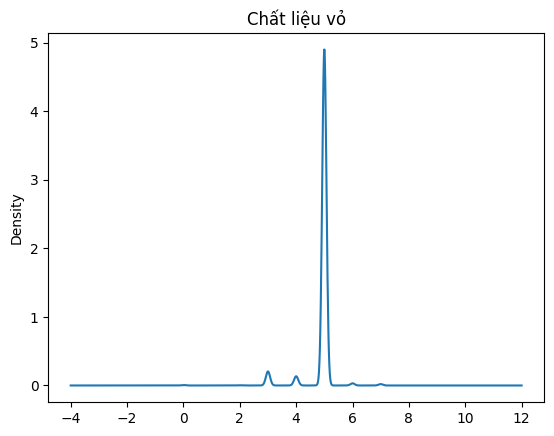

<Axes: ylabel='Density'>

Text(0.5, 1.0, 'Xuất xứ')

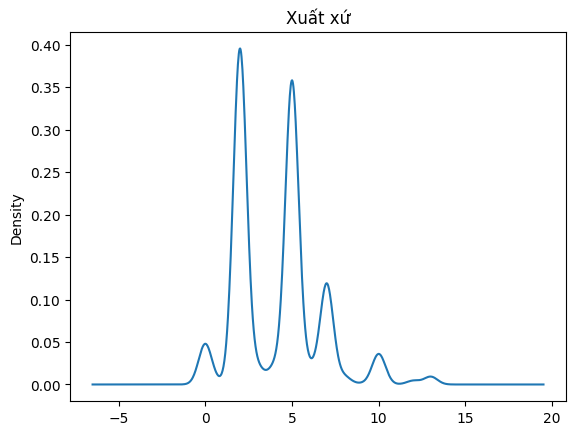

<Axes: ylabel='Density'>

Text(0.5, 1.0, 'Giới tính')

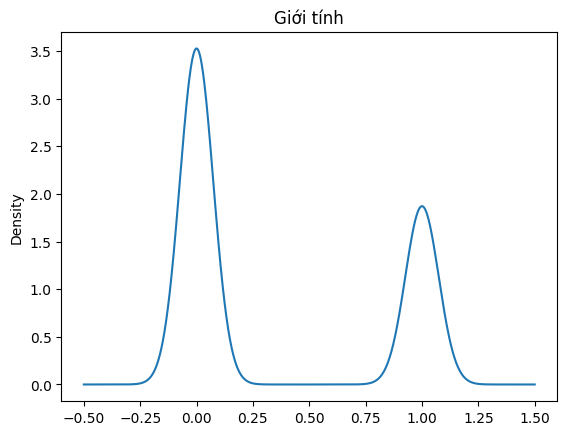

<Axes: ylabel='Density'>

Text(0.5, 1.0, 'Chất liệu mặt kính')

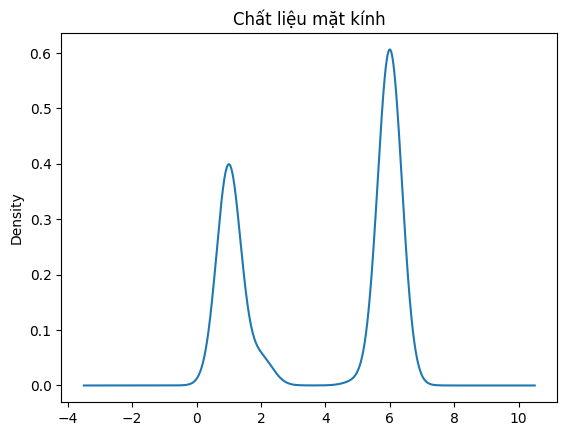

<Axes: ylabel='Density'>

Text(0.5, 1.0, 'Độ chịu nước (ATM)')

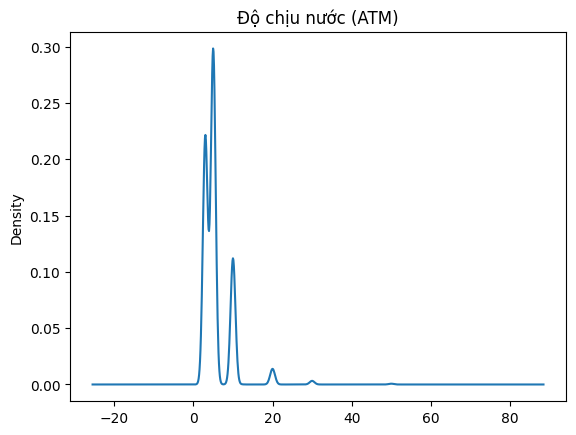

<Axes: ylabel='Density'>

Text(0.5, 1.0, 'Bảo hành')

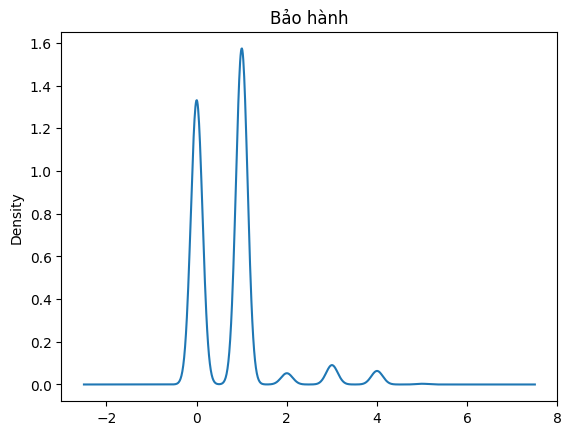

<Axes: ylabel='Density'>

Text(0.5, 1.0, 'Kiểu máy')

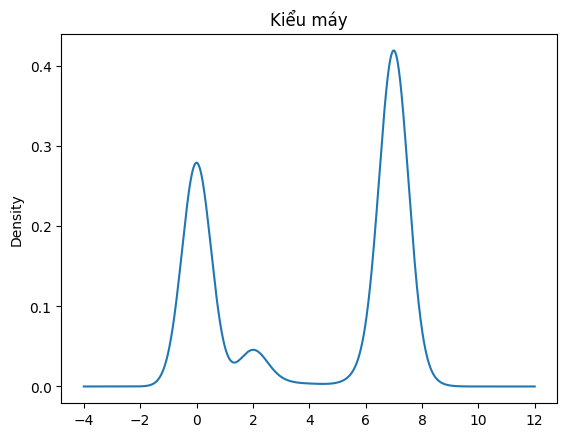

<Axes: ylabel='Density'>

Text(0.5, 1.0, 'Kích cỡ (mm)')

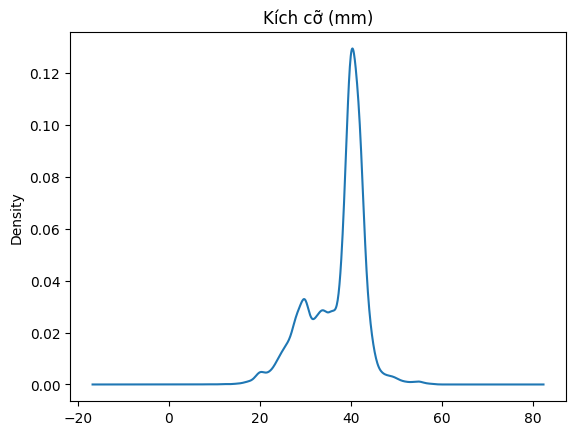

time: 3.78 s (started: 2023-05-21 17:35:58 +07:00)


In [615]:
train_ds = outlier_processing(train_ds)

for c in list(train_ds.columns):
    train_ds[c].plot(kind="kde")
    plt.title(c)
    plt.show()


Normalize data

In [616]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

cols_need_normalize = list(train_ds.drop('Giá tiền (VNĐ)', axis=1).columns)

train_ds[cols_need_normalize] = scaler.fit_transform(train_ds[cols_need_normalize])
test_ds[cols_need_normalize] = scaler.fit_transform(test_ds[cols_need_normalize])


time: 16 ms (started: 2023-05-21 17:36:02 +07:00)


In [617]:
from sklearn.metrics import mean_squared_error

X_train = train_ds.drop(["Giá tiền (VNĐ)"], axis=1)
y_train = train_ds["Giá tiền (VNĐ)"]
X_test = test_ds.drop("Giá tiền (VNĐ)", axis=1)
y_test = test_ds["Giá tiền (VNĐ)"]

time: 0 ns (started: 2023-05-21 17:36:02 +07:00)


Tree Decision to to select feature


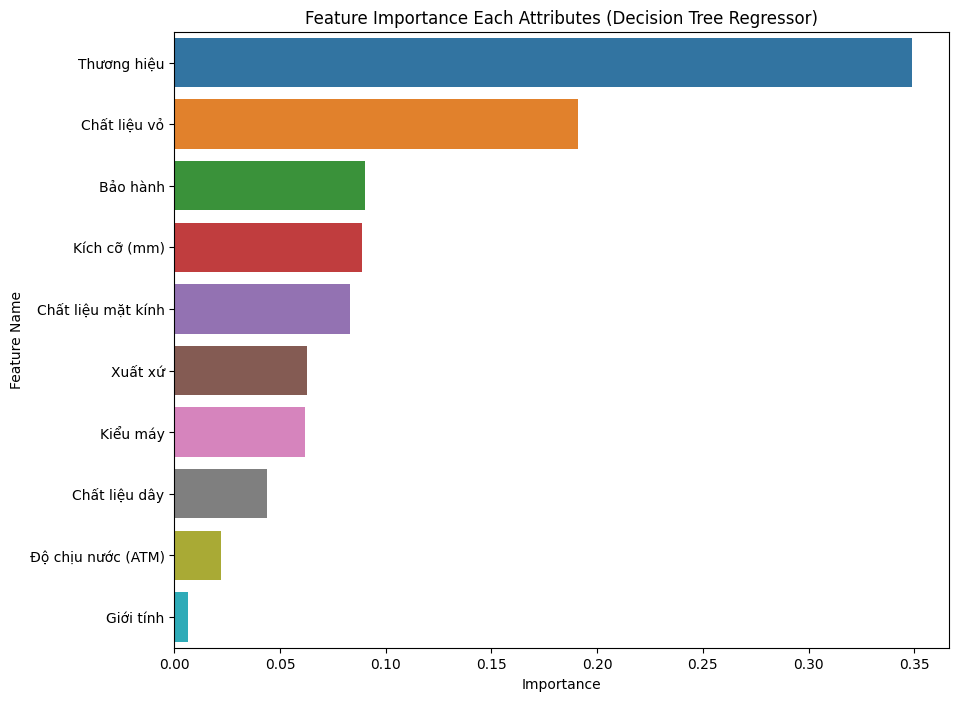

time: 219 ms (started: 2023-05-21 17:36:02 +07:00)


In [618]:
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor()

dtree.fit(X_train, y_train)

imp_df = pd.DataFrame(
    {"Feature Name": X_train.columns, "Importance": dtree.feature_importances_}
)

fi = imp_df.sort_values(by="Importance", ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(10, 8))
sns.barplot(data=fi2, x="Importance", y="Feature Name")
plt.title("Feature Importance Each Attributes (Decision Tree Regressor)")

plt.xlabel("Importance")
plt.ylabel("Feature Name")
plt.show();

In [619]:
top_9_features = list(fi.head(9)["Feature Name"])

top_9_features.append('Giá tiền (VNĐ)')

time: 0 ns (started: 2023-05-21 17:36:03 +07:00)


In [620]:
train_ds_select_feats = train_ds[top_9_features]
test_ds_select_feats = test_ds[top_9_features]

time: 0 ns (started: 2023-05-21 17:36:03 +07:00)


In [621]:
train_ds_select_feats.shape
test_ds_select_feats.shape

(11059, 10)

(2765, 10)

time: 0 ns (started: 2023-05-21 17:36:03 +07:00)


In [622]:
train_ds_select_feats.to_csv('train_ds_process.csv', index=False)
test_ds_select_feats.to_csv('test_ds_process.csv', index=False)

time: 157 ms (started: 2023-05-21 17:36:03 +07:00)
